In [68]:
###Map Search

In [69]:
BEIJING,CHANGCHUN,MULUMUQI,WUHAN,GUANGZHOU,SHENZHEN,BANGKOK,SHANGHAI,NEWYORK="""
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK""".split()

In [3]:
connection={
    CHANGCHUN:[BEIJING],
    MULUMUQI:[BEIJING],
    BEIJING:[MULUMUQI,CHANGCHUN,WUHAN,SHENZHEN,NEWYORK],
    NEWYORK:[BEIJING,SHANGHAI],
    SHANGHAI:[NEWYORK,WUHAN],
    WUHAN:[SHANGHAI,BEIJING,GUANGZHOU],
    GUANGZHOU:[WUHAN,BANGKOK],
    SHENZHEN:[WUHAN,BANGKOK],
    BANGKOK:[SHENZHEN,GUANGZHOU]
}

In [4]:
import networkx as nx

In [5]:
matplotlib inline

In [6]:
graph=connection

In [7]:
g=nx.Graph(graph)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


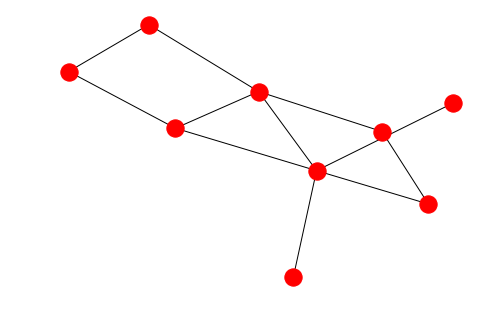

In [8]:
nx.draw(g)

In [9]:
def nagivator(start,destination,connection_graph):    
    pathes=[[start] ]
    #将已经过的内容放在seen中，防止往回看
    seen=set()
    while pathes:
        path=pathes.pop(0)
        froniter=path[-1]
#         print ("I am standing at :{}".format(froniter))
        if froniter in seen:continue
        successors=connection_graph[froniter]
        
        for s in successors:
#             print ("\-----I am look forward :{}". format(s))
            if s==destination:
                path.append(s)
                return path
            else:
                pathes.append(path+[s])
        pathes=sorted(pathes,key=len)#最小换乘
#         pathes+=successors
        seen.add(froniter)

In [10]:
nagivator(CHANGCHUN,BANGKOK,connection)

['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [11]:
def nagivator_bfs(start,destination,connection_graph):
    pathes=[start]
    seen=set()
    while pathes:
        froniter =pathes.pop(0)
        if froniter in seen:continue
        successors=connection_graph[froniter]
        print('standing on {}looking forward {}'.format(froniter,successors))
        pathes=pathes+successors       
        seen.add(froniter)
nagivator_bfs(CHANGCHUN,BANGKOK,connection)

standing on CHANGCHUNlooking forward ['BEIJING']
standing on BEIJINGlooking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on MULUMUQIlooking forward ['BEIJING']
standing on WUHANlooking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on SHENZHENlooking forward ['WUHAN', 'BANGKOK']
standing on NEWYORKlooking forward ['BEIJING', 'SHANGHAI']
standing on SHANGHAIlooking forward ['NEWYORK', 'WUHAN']
standing on GUANGZHOUlooking forward ['WUHAN', 'BANGKOK']
standing on BANGKOKlooking forward ['SHENZHEN', 'GUANGZHOU']


In [12]:
def nagivator_dfs(start,destination,connection_graph):
    pathes=[start]
    seen=set()
    while pathes:
        froniter=pathes.pop(0)
        if froniter in seen:continue
        successors=connection_graph[froniter]
        print('standing on {}looking forward {}'.format(froniter,successors))
        pathes=successors+pathes
        
        seen.add(froniter)
nagivator_dfs(CHANGCHUN,BANGKOK,connection)        

standing on CHANGCHUNlooking forward ['BEIJING']
standing on BEIJINGlooking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on MULUMUQIlooking forward ['BEIJING']
standing on WUHANlooking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on SHANGHAIlooking forward ['NEWYORK', 'WUHAN']
standing on NEWYORKlooking forward ['BEIJING', 'SHANGHAI']
standing on GUANGZHOUlooking forward ['WUHAN', 'BANGKOK']
standing on BANGKOKlooking forward ['SHENZHEN', 'GUANGZHOU']
standing on SHENZHENlooking forward ['WUHAN', 'BANGKOK']


In [13]:
##Sentence Generation##

In [34]:
grammer = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [35]:
import random

In [ ]:
def parse_grammer(grammer_str,sep='=>'):
    grammer={}
    for line in grammer_str.split('\n'):
        line=line.strip()
        if not line:continue
        target,rules=line.split(sep)
        grammer[target.strip()]=[r.split()for r in rules.split('|')]
    return grammer

In [50]:
g=parse_grammer(grammer)

In [51]:
g

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [62]:
def gene(grammer_parsed,target='sentence'):
    if target not in grammer_parsed:return target
    rule=random.choice(grammer_parsed[target])
    return ''.join(gene(grammer_parsed,target=r) for r in rule if r!='null')

In [63]:
gene(g)

'一个篮球听着这个桌子'